Notebook de exploração da API do TEMPO

In [4]:
import earthaccess  # needed to discover and download TEMPO data
import netCDF4 as nc  # needed to read TEMPO data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  # needed to plot the resulting time series

c:\Users\MEUCOMPUTADOR\Documents\NASA\space_apps_hackaton\nasa_space_apps\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data = "data/US_GeoCode.csv"

In [6]:
df = pd.read_csv(data)

In [7]:
def get_lat_lon(state_name):
    df = pd.read_csv(data)
    return df[df['stateSigla'] == state_name]['latitude'].values[0], df[df['stateSigla'] == state_name]['longitude'].values[0]


In [76]:
get_lat_lon("AK")

(np.float64(63.588753), np.float64(-154.493062))

In [9]:
auth = earthaccess.login(persist=True)

In [77]:
short_name = "TEMPO_NO2_L3"  # collection name to search for in the EarthData
version = "V03"

# Point of interest: NASA Langley Research Center, HamptonVA, USA
# latitude 37.1036 deg, longitude -76.3868 deg
# POI_lat = 37.1036
# POI_lon = -76.3868

# generic location, somewhere in the middle of the USA
POI_lat = get_lat_lon("AK")[0]
POI_lon = get_lat_lon("AK")[1]
date_start = "2025-09-18 00:00:00"
date_end = "2025-09-18 23:59:59"

In [78]:
short_name = "TEMPO_NO2_L3"  # collection name to search for in the EarthData
version = "V03"

# Point of interest: NASA Langley Research Center, HamptonVA, USA
# latitude 37.1036 deg, longitude -76.3868 deg
# POI_lat = 37.1036
# POI_lon = -76.3868

# generic location, somewhere in the middle of the USA
POI_lat = get_lat_lon("AK")[0]
POI_lon = get_lat_lon("AK")[1]
date_start = "2025-09-18 00:00:00"
date_end = "2025-09-18 23:59:59"

POI_results = earthaccess.search_data(
    short_name=short_name,
    version=version,
    temporal=(date_start, date_end),
    point=(POI_lon, POI_lat),  
)

print(len(POI_results))

0


In [81]:
short_name = "TEMPO_NO2_L3"  # collection name to search for in the EarthData
version = "V03"

# Point of interest: NASA Langley Research Center, HamptonVA, USA
# latitude 37.1036 deg, longitude -76.3868 deg
# POI_lat = 37.1036
# POI_lon = -76.3868

# generic location, somewhere in the middle of the USA
POI_lat = get_lat_lon("NY")[0]
POI_lon = get_lat_lon("NY")[1]
date_start = "2025-09-16 00:00:00"
date_end = "2025-09-16 23:59:59"

POI_results = earthaccess.search_data(
    short_name=short_name,
    version=version,
    temporal=(date_start, date_end),
    point=(POI_lon, POI_lat),  
)

print(len(POI_results))

11


In [72]:
POI_lat, POI_lon

(np.float64(43.299428), np.float64(-74.217933))

In [51]:
import datetime as dt

def find_available_data(start_date, max_days=30):
    """
    Procura por dados TEMPO disponíveis incrementando o dia até encontrar resultados
    
    Parameters:
    start_date: data inicial no formato "YYYY-MM-DD"
    max_days: número máximo de dias para procurar (padrão: 30)
    
    Returns:
    tuple: (data_encontrada, POI_results) ou (None, None) se não encontrar
    """
    
    # Converter string para datetime
    current_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
    
    for day in range(max_days):
        # Formatar data atual
        date_str = current_date.strftime("%Y-%m-%d")
        date_start = f"{date_str} 00:00:00"
        date_end = f"{date_str} 23:59:59"
        
        print(f"Procurando dados para: {date_str}")
        
        # Buscar dados
        POI_results = earthaccess.search_data(
            short_name=short_name,
            version=version,
            temporal=(date_start, date_end),
            point=(POI_lon, POI_lat),  
        )
        
        print(f"  Resultados encontrados: {len(POI_results)}")
        
        # Se encontrou dados, retornar
        if len(POI_results) > 0:
            print(f"✅ Dados encontrados para {date_str}!")
            return date_str, POI_results
        
        # Incrementar um dia
        current_date -= dt.timedelta(days=1)
    
    print(f"❌ Nenhum dado encontrado nos próximos {max_days} dias")
    return None, None

# Usar a função
start_date = "2025-09-18"  # Data inicial
found_date, POI_results = find_available_data(start_date)

if found_date:
    print(f"\n🎉 Dados disponíveis encontrados para: {found_date}")
    print(f"Total de resultados: {len(POI_results)}")
    
    # Atualizar as variáveis globais
    date_start = f"{found_date} 00:00:00"
    date_end = f"{found_date} 23:59:59"
    
    # Mostrar informações dos primeiros resultados
    for i, result in enumerate(POI_results[:3]):  # Mostrar apenas os primeiros 3
        print(f"\nResultado {i+1}:")
        print(f"  Nome: {result.get('umm', {}).get('TemporalExtent', {}).get('SingleDateTime', 'N/A')}")
        print(f"  Links: {len(result.data_links())}")
else:
    print("Nenhum dado encontrado. Tente uma data diferente ou verifique a conectividade.")

Procurando dados para: 2025-09-18
  Resultados encontrados: 0
Procurando dados para: 2025-09-17
  Resultados encontrados: 0
Procurando dados para: 2025-09-16
  Resultados encontrados: 11
✅ Dados encontrados para 2025-09-16!

🎉 Dados disponíveis encontrados para: 2025-09-16
Total de resultados: 11

Resultado 1:
  Nome: N/A
  Links: 1

Resultado 2:
  Nome: N/A
  Links: 1

Resultado 3:
  Nome: N/A
  Links: 1


In [48]:
POI_results = earthaccess.search_data(
    short_name=short_name,
    version=version,
    temporal=(date_start, date_end),
    point=(POI_lon, POI_lat),  
)

print(len(POI_results))

0


In [79]:
POI_results

[]

In [24]:
dlat = 0.0  # deg
dlon = 0.0  # deg

bbox_results = earthaccess.search_data(
    short_name=short_name,
    version=version,
    temporal=(date_start, date_end),
    bounding_box=(
        POI_lon - dlon,
        POI_lat - dlat,
        POI_lon + dlon,
        POI_lat + dlat,
    ),  
)

print(len(bbox_results))

12


In [2]:
def read_TEMPO_NO2_L3(fn):
    with nc.Dataset(fn) as ds:  # open read access to file
        # Open the 'product' group.
        prod = ds.groups["product"]

        # Read variable vertical_column_stratosphere from the product group.
        var = prod.variables["vertical_column_stratosphere"]
        strat_NO2_column = var[:]  # retrieve the numpy array.
        fv_strat_NO2 = var.getncattr("_FillValue")

        # Read variable 'vertical_column_troposphere' from the product group.
        var = prod.variables["vertical_column_troposphere"]
        trop_NO2_column = var[:]
        fv_trop_NO2 = var.getncattr("_FillValue")
        NO2_unit = var.getncattr("units")

        # Read variable 'main_data_quality_flag' from the product group.
        QF = prod.variables["main_data_quality_flag"][:]

        # Read latitude and longitude variables, from the root (/) group, into a numpy array.
        lat = ds.variables["latitude"][:]
        lon = ds.variables["longitude"][:]

    return lat, lon, strat_NO2_column, fv_strat_NO2, trop_NO2_column, fv_trop_NO2, NO2_unit, QF

In [172]:
POI_results[8]

Collection: {'ShortName': 'TEMPO_NO2_L3', 'Version': 'V03'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 57.34, 'Longitude': -164}, {'Latitude': 57.14, 'Longitude': -163.44}, {'Latitude': 56.7, 'Longitude': -162.92}, {'Latitude': 56.26, 'Longitude': -160.32}, {'Latitude': 55.74, 'Longitude': -157.84}, {'Latitude': 54.4, 'Longitude': -152.84}, {'Latitude': 53.18, 'Longitude': -149.3}, {'Latitude': 51.78, 'Longitude': -145.96}, {'Latitude': 50, 'Longitude': -142.46}, {'Latitude': 47.88, 'Longitude': -139.04}, {'Latitude': 45.74, 'Longitude': -136.18}, {'Latitude': 43.58, 'Longitude': -133.74}, {'Latitude': 40.82, 'Longitude': -131.12}, {'Latitude': 38.18, 'Longitude': -129.02}, {'Latitude': 35.42, 'Longitude': -127.16}, {'Latitude': 32.24, 'Longitude': -125.36}, {'Latitude': 28.92, 'Longitude': -123.8}, {'Latitude': 25.4, 'Longitude': -122.44}, {'Latitude': 21.4, 'Longitude': -121.2}, {'Latitude': 17.56, 'Longitude': -120.26}, {'Latitude': 17.32, 'Longitude': -108.04}, {'Latitude': 17.2, 'Longitude': -93.14}, {'Latitude': 17.26, 'Longitude': -79.26}, {'Latitude': 17.48, 'Longitude': -65.18}, {'Latitude': 22.26, 'Longitude': -64.10001}, {'Latitude': 25.84, 'Longitude': -63.08}, {'Latitude': 29.54, 'Longitude': -61.8}, {'Latitude': 32.9, 'Longitude': -60.4}, {'Latitude': 36.12, 'Longitude': -58.8}, {'Latitude': 39.32, 'Longitude': -56.9}, {'Latitude': 42.02, 'Longitude': -55}, {'Latitude': 44.76, 'Longitude': -52.72}, {'Latitude': 47.72, 'Longitude': -49.74001}, {'Latitude': 50.4, 'Longitude': -46.42001}, {'Latitude': 52.6, 'Longitude': -43.08}, {'Latitude': 54.8, 'Longitude': -38.94}, {'Latitude': 56.52, 'Longitude': -34.88}, {'Latitude': 58.02, 'Longitude': -30.40001}, {'Latitude': 59.32, 'Longitude': -25.3}, {'Latitude': 60.26, 'Longitude': -20.16}, {'Latitude': 61.08, 'Longitude': -20.10001}, {'Latitude': 61.04, 'Longitude': -20.38}, {'Latitude': 61.82, 'Longitude': -20.40001}, {'Latitude': 61.76, 'Longitude': -20.82001}, {'Latitude': 61.88, 'Longitude': -20.84}, {'Latitude': 61.84, 'Longitude': -21.06}, {'Latitude': 61.94, 'Longitude': -21.08}, {'Latitude': 61.92, 'Longitude': -21.3}, {'Latitude': 62.02, 'Longitude': -21.38}, {'Latitude': 63.26, 'Longitude': -21.40001}, {'Latitude': 63.22, 'Longitude': -21.68001}, {'Latitude': 63.6, 'Longitude': -21.7}, {'Latitude': 63.54, 'Longitude': -22.22}, {'Latitude': 63.8, 'Longitude': -22.24001}, {'Latitude': 63.68, 'Longitude': -23.06}, {'Latitude': 63.72, 'Longitude': -23.14}, {'Latitude': 62.34, 'Longitude': -32.76001}, {'Latitude': 60.8, 'Longitude': -44.24001}, {'Latitude': 59.68, 'Longitude': -54.36}, {'Latitude': 58.76, 'Longitude': -64.04}, {'Latitude': 58.24, 'Longitude': -71.5}, {'Latitude': 57.88, 'Longitude': -78.9}, {'Latitude': 57.68, 'Longitude': -86.44}, {'Latitude': 57.66, 'Longitude': -94.4}, {'Latitude': 57.8, 'Longitude': -101.12}, {'Latitude': 58.16, 'Longitude': -109.24}, {'Latitude': 58.72, 'Longitude': -117.46}, {'Latitude': 59.48, 'Longitude': -126.04}, {'Latitude': 60.02, 'Longitude': -131.28}, {'Latitude': 60.9, 'Longitude': -138.34}, {'Latitude': 60.92, 'Longitude': -138.92}, {'Latitude': 61.2, 'Longitude': -140.72}, {'Latitude': 61.18, 'Longitude': -141.06}, {'Latitude': 61.3, 'Longitude': -141.5}, {'Latitude': 61.26, 'Longitude': -141.6}, {'Latitude': 61.38, 'Longitude': -142.1}, {'Latitude': 62.12, 'Longitude': -147.68}, {'Latitude': 62.1, 'Longitude': -147.9}, {'Latitude': 63.8, 'Longitude': -159.6}, {'Latitude': 63.52, 'Longitude': -159.62}, {'Latitude': 63.56, 'Longitude': -159.92}, {'Latitude': 63.3, 'Longitude': -159.94}, {'Latitude': 63.4, 'Longitude': -160.72}, {'Latitude': 62.8, 'Longitude': -160.74}, {'Latitude': 62.88, 'Longitude': -161.3}, {'Latitude': 61.62, 'Longitude': -161.5}, {'Latitude': 61.66, 'Longitude': -161.84}, {'Latitude': 61.28, 'Longitude': -161.86}, {'Latitude': 61.28, 'Longitude': -161.96}, {'Latitude': 59.72, 'Longitude': -162.08}, {'Latitude': 59.74, 'Longitu

In [173]:
POI_results[12]

Collection: {'ShortName': 'TEMPO_NO2_L3', 'Version': 'V03'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 57.22, 'Longitude': -163.84}, {'Latitude': 56.94, 'Longitude': -163.18}, {'Latitude': 56.66, 'Longitude': -162.9}, {'Latitude': 56.3, 'Longitude': -160.7}, {'Latitude': 55.74, 'Longitude': -157.98}, {'Latitude': 54.48, 'Longitude': -153.2}, {'Latitude': 53.3, 'Longitude': -149.7}, {'Latitude': 51.94, 'Longitude': -146.38}, {'Latitude': 50.18, 'Longitude': -142.84}, {'Latitude': 48.2, 'Longitude': -139.56}, {'Latitude': 46, 'Longitude': -136.54}, {'Latitude': 43.72, 'Longitude': -133.92}, {'Latitude': 41.2, 'Longitude': -131.48}, {'Latitude': 38.12, 'Longitude': -129}, {'Latitude': 35.32, 'Longitude': -127.12}, {'Latitude': 32.28, 'Longitude': -125.4}, {'Latitude': 28.64, 'Longitude': -123.7}, {'Latitude': 25.12, 'Longitude': -122.36}, {'Latitude': 21.34, 'Longitude': -121.2}, {'Latitude': 17.56, 'Longitude': -120.28}, {'Latitude': 17.36, 'Longitude': -110.5}, {'Latitude': 17.22, 'Longitude': -97.42}, {'Latitude': 17.26, 'Longitude': -79.64}, {'Latitude': 17.48, 'Longitude': -65.18}, {'Latitude': 20.92, 'Longitude': -64.42001}, {'Latitude': 25.28, 'Longitude': -63.24001}, {'Latitude': 29.08, 'Longitude': -61.96}, {'Latitude': 32.74, 'Longitude': -60.46}, {'Latitude': 36.06, 'Longitude': -58.82}, {'Latitude': 39.18, 'Longitude': -56.98}, {'Latitude': 42.06, 'Longitude': -54.96}, {'Latitude': 44.64, 'Longitude': -52.82}, {'Latitude': 47.68, 'Longitude': -49.78001}, {'Latitude': 50.34, 'Longitude': -46.5}, {'Latitude': 52.86, 'Longitude': -42.64}, {'Latitude': 54.86, 'Longitude': -38.82001}, {'Latitude': 56.66, 'Longitude': -34.52}, {'Latitude': 58.08, 'Longitude': -30.22}, {'Latitude': 59.16, 'Longitude': -26.06}, {'Latitude': 60.12, 'Longitude': -21.06}, {'Latitude': 60.36, 'Longitude': -20.38}, {'Latitude': 60.46, 'Longitude': -19.60001}, {'Latitude': 61.22, 'Longitude': -19.58}, {'Latitude': 61.14, 'Longitude': -20.2}, {'Latitude': 61.24, 'Longitude': -20.22}, {'Latitude': 61.22, 'Longitude': -20.38}, {'Latitude': 61.6, 'Longitude': -20.40001}, {'Latitude': 61.58, 'Longitude': -20.64}, {'Latitude': 61.68, 'Longitude': -20.66}, {'Latitude': 61.62, 'Longitude': -21.06}, {'Latitude': 61.84, 'Longitude': -21.14}, {'Latitude': 61.8, 'Longitude': -21.38}, {'Latitude': 63.38, 'Longitude': -21.40001}, {'Latitude': 63.32, 'Longitude': -21.90001}, {'Latitude': 63.7, 'Longitude': -21.92}, {'Latitude': 63.58, 'Longitude': -22.74001}, {'Latitude': 63.72, 'Longitude': -22.76001}, {'Latitude': 63.72, 'Longitude': -22.90001}, {'Latitude': 62.36, 'Longitude': -32.40001}, {'Latitude': 60.78, 'Longitude': -44.22}, {'Latitude': 59.84, 'Longitude': -52.58}, {'Latitude': 59.26, 'Longitude': -58.38}, {'Latitude': 58.7, 'Longitude': -64.64}, {'Latitude': 58.12, 'Longitude': -73.52}, {'Latitude': 57.8, 'Longitude': -81.12}, {'Latitude': 57.66, 'Longitude': -88.64}, {'Latitude': 57.7, 'Longitude': -96.92}, {'Latitude': 57.94, 'Longitude': -104.74}, {'Latitude': 58.4, 'Longitude': -113.02}, {'Latitude': 59, 'Longitude': -120.84}, {'Latitude': 59.94, 'Longitude': -130.56}, {'Latitude': 60.54, 'Longitude': -135.34}, {'Latitude': 60.54, 'Longitude': -135.8}, {'Latitude': 60.88, 'Longitude': -138.2}, {'Latitude': 60.86, 'Longitude': -138.44}, {'Latitude': 61.1, 'Longitude': -139.94}, {'Latitude': 61.04, 'Longitude': -140.06}, {'Latitude': 61.18, 'Longitude': -140.62}, {'Latitude': 61.22, 'Longitude': -141.4}, {'Latitude': 61.36, 'Longitude': -141.94}, {'Latitude': 62.12, 'Longitude': -148.02}, {'Latitude': 63.54, 'Longitude': -157.8}, {'Latitude': 63.7, 'Longitude': -159.6}, {'Latitude': 63.44, 'Longitude': -159.62}, {'Latitude': 63.52, 'Longitude': -160.14}, {'Latitude': 63.14, 'Longitude': -160.16}, {'Latitude': 63.28, 'Longitude': -161.16}, {'Latitude': 62.04, 'Longitude': -161.18}, {'Latitude': 61.94, 'Longitude': -161.28}, {'Latitude': 61.98, 'Longitude': -161.54}, {'Latitude': 61.88

In [59]:
files = earthaccess.download(POI_results[8], local_path=".")

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 392.91it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [01:16<00:00, 76.13s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<?, ?it/s]


In [193]:
import numpy as np

# Seus dados originais
POI_lat = get_lat_lon("NY")[0]  # Sua latitude
POI_lon = get_lat_lon("NY")[1]  # Sua longitude

# Encontrar o índice mais próximo da sua coordenada
lat_idx = np.argmin(np.abs(lat - POI_lat))
lon_idx = np.argmin(np.abs(lon - POI_lon))

# Pegar apenas os dados desse ponto específico
trop_NO2_value = trop_NO2_column[0, lat_idx, lon_idx]
strat_NO2_value = strat_NO2_column[0, lat_idx, lon_idx]
QF_value = QF[0, lat_idx, lon_idx]

# Verificar se os dados são válidos
is_valid = (QF_value == 0) & (trop_NO2_value > 0.0) & (strat_NO2_value > 0.0)

# Calcular o total de NO2
total_NO2 = trop_NO2_value + strat_NO2_value

# Mostrar os resultados
print("=" * 50)
print(f"DADOS PARA COORDENADA ({POI_lat}, {POI_lon})")
print("=" * 50)
print(f"Índice mais próximo: lat[{lat_idx}], lon[{lon_idx}]")
print(f"Coordenada real: ({lat[lat_idx]:.4f}, {lon[lon_idx]:.4f})")
print(f"Distância: {abs(lat[lat_idx] - POI_lat):.4f}° lat, {abs(lon[lon_idx] - POI_lon):.4f}° lon")
print()
print(f"NO2 Troposférico: {trop_NO2_value:.2e} {NO2_unit}")
print(f"NO2 Estratosférico: {strat_NO2_value:.2e} {NO2_unit}")
print(f"NO2 Total: {total_NO2:.2e} {NO2_unit}")
print(f"Quality Flag: {QF_value}")
print(f"Dados válidos: {'Sim' if is_valid else 'Não'}")

DADOS PARA COORDENADA (43.299428, -74.217933)
Índice mais próximo: lat[1464], lon[4689]
Coordenada real: (43.2900, -74.2100)
Distância: 0.0094° lat, 0.0079° lon

NO2 Troposférico: 1.18e+15 molecules/cm^2
NO2 Estratosférico: 3.05e+15 molecules/cm^2
NO2 Total: 4.23e+15 molecules/cm^2
Quality Flag: 0
Dados válidos: Sim


In [197]:
import requests

states = {
    "California": (36.7783, -119.4179),
    "Colorado": (39.5501, -105.7821),
    "Florida": (27.6648, -81.5158),
    "New York": (43.0000, -75.0000),
    "Texas": (31.0000, -100.0000),
    "Northern Mariana Islands": (15.183333,145.75),
}

for state, (lat, lng) in states.items():
    url = f"https://api.open-elevation.com/api/v1/lookup?locations={lat},{lng}"
    data = requests.get(url).json()
    elevation = data["results"][0]["elevation"]
    print(f"{state}: {elevation} m")


California: 147.0 m
Colorado: 3428.0 m
Florida: 31.0 m
New York: 165.0 m
Texas: 665.0 m
Northern Mariana Islands: 226.0 m


In [58]:
POI_results[8].data_links()

['https://data.asdc.earthdata.nasa.gov/asdc-prod-protected/TEMPO/TEMPO_NO2_L3_V03/2025.09.16/TEMPO_NO2_L3_V03_20250916T190309Z_S010.nc']

In [ ]:
granule_name = POI_results[8].data_links()[0].split("/")[-1]
print(granule_name)

lat, lon, strat_NO2_column, fv_strat_NO2, trop_NO2_column, fv_trop_NO2, NO2_unit, QF = (
    read_TEMPO_NO2_L3(granule_name)
)

TEMPO_NO2_L3_V03_20250916T190309Z_S010.nc


In [61]:
lat, lon

(masked_array(data=[14.01, 14.03, 14.05, ..., 72.95, 72.97, 72.99],
              mask=False,
        fill_value=np.float64(1e+20),
             dtype=float32),
 masked_array(data=[-167.99, -167.97, -167.95, ...,  -13.05,  -13.03,
                     -13.01],
              mask=False,
        fill_value=np.float64(1e+20),
             dtype=float32))

In [74]:
len(lat)

2950

In [73]:
len(lon)

7750

In [70]:
strat_NO2_column

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],
  fill_value=-1e+30)

In [176]:
granule_name

'TEMPO_NO2_L3_V03_20250901T174814Z_S010.nc'

In [177]:
fv_strat_NO2

np.float64(-1e+30)

In [178]:
fv_strat_NO2.shape

()

In [179]:
strat_NO2_column

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],
  fill_value=-1e+30)

In [180]:
bbox_results

[Collection: {'ShortName': 'TEMPO_NO2_L3', 'Version': 'V03'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 57.6, 'Longitude': -111.02}, {'Latitude': 53.74, 'Longitude': -108.86}, {'Latitude': 49.58, 'Longitude': -107.06}, {'Latitude': 45, 'Longitude': -105.52}, {'Latitude': 40.08, 'Longitude': -104.24}, {'Latitude': 34.76, 'Longitude': -103.18}, {'Latitude': 28.56, 'Longitude': -102.26}, {'Latitude': 23.42, 'Longitude': -101.7}, {'Latitude': 17.2, 'Longitude': -101.22}, {'Latitude': 17.14, 'Longitude': -93.2}, {'Latitude': 17.18, 'Longitude': -82.24001}, {'Latitude': 17.44, 'Longitude': -65.18}, {'Latitude': 22.18, 'Longitude': -64.10001}, {'Latitude': 25.64, 'Longitude': -63.12}, {'Latitude': 29.58, 'Longitude': -61.76}, {'Latitude': 33.06, 'Longitude': -60.3}, {'Latitude': 36.32, 'Longitude': -58.66}, {'Latitude': 39.3, 'Longitude': -56.88}, {'Latitude': 42.36, 'Longitude': -54.7}, {'Latitude': 45.36, 'Longitude': -52

In [181]:
good_data_mask = (QF == 0) & (trop_NO2_column != fv_trop_NO2) & (strat_NO2_column != fv_strat_NO2)
print(good_data_mask.shape)

(1, 2950, 7750)


In [182]:
good_trop_NO2_column = trop_NO2_column[good_data_mask]
len(good_trop_NO2_column)

7500756

In [183]:
min(good_trop_NO2_column)

np.float64(-1.9813752488177005e+17)

In [66]:
# Define a region of interest.
dlat = 5  # deg
dlon = 6  # deg
mask_lat = (lat > POI_lat - dlat) & (lat < POI_lat + dlat)
mask_lon = (lon > POI_lon - dlon) & (lon < POI_lon + dlon)

# Subset NO2 column arrays.
trop_NO2_column_loc = trop_NO2_column[0, mask_lat, :][:, mask_lon]
strat_NO2_column_loc = strat_NO2_column[0, mask_lat, :][:, mask_lon]
QF_loc = QF[0, mask_lat, :][:, mask_lon]
best_data_mask_loc = (QF_loc == 0) & (trop_NO2_column_loc > 0.0) & (strat_NO2_column_loc > 0.0)

# Create 2D arrays of latitudes and longitudes, by repeating lon/lat along rows/columns.
nlat, nlon = trop_NO2_column_loc.shape
lon_loc_2D = np.vstack([lon[mask_lon]] * nlat)
lat_loc_2D = np.column_stack([lat[mask_lat]] * nlon)

In [85]:
QF

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],
  fill_value=-9999,
  dtype=int16)

In [67]:
lat_loc_2D

masked_array(
  data=[[38.31, 38.31, 38.31, ..., 38.31, 38.31, 38.31],
        [38.33, 38.33, 38.33, ..., 38.33, 38.33, 38.33],
        [38.35, 38.35, 38.35, ..., 38.35, 38.35, 38.35],
        ...,
        [48.25, 48.25, 48.25, ..., 48.25, 48.25, 48.25],
        [48.27, 48.27, 48.27, ..., 48.27, 48.27, 48.27],
        [48.29, 48.29, 48.29, ..., 48.29, 48.29, 48.29]],
  mask=False,
  fill_value=np.float64(1e+20),
  dtype=float32)

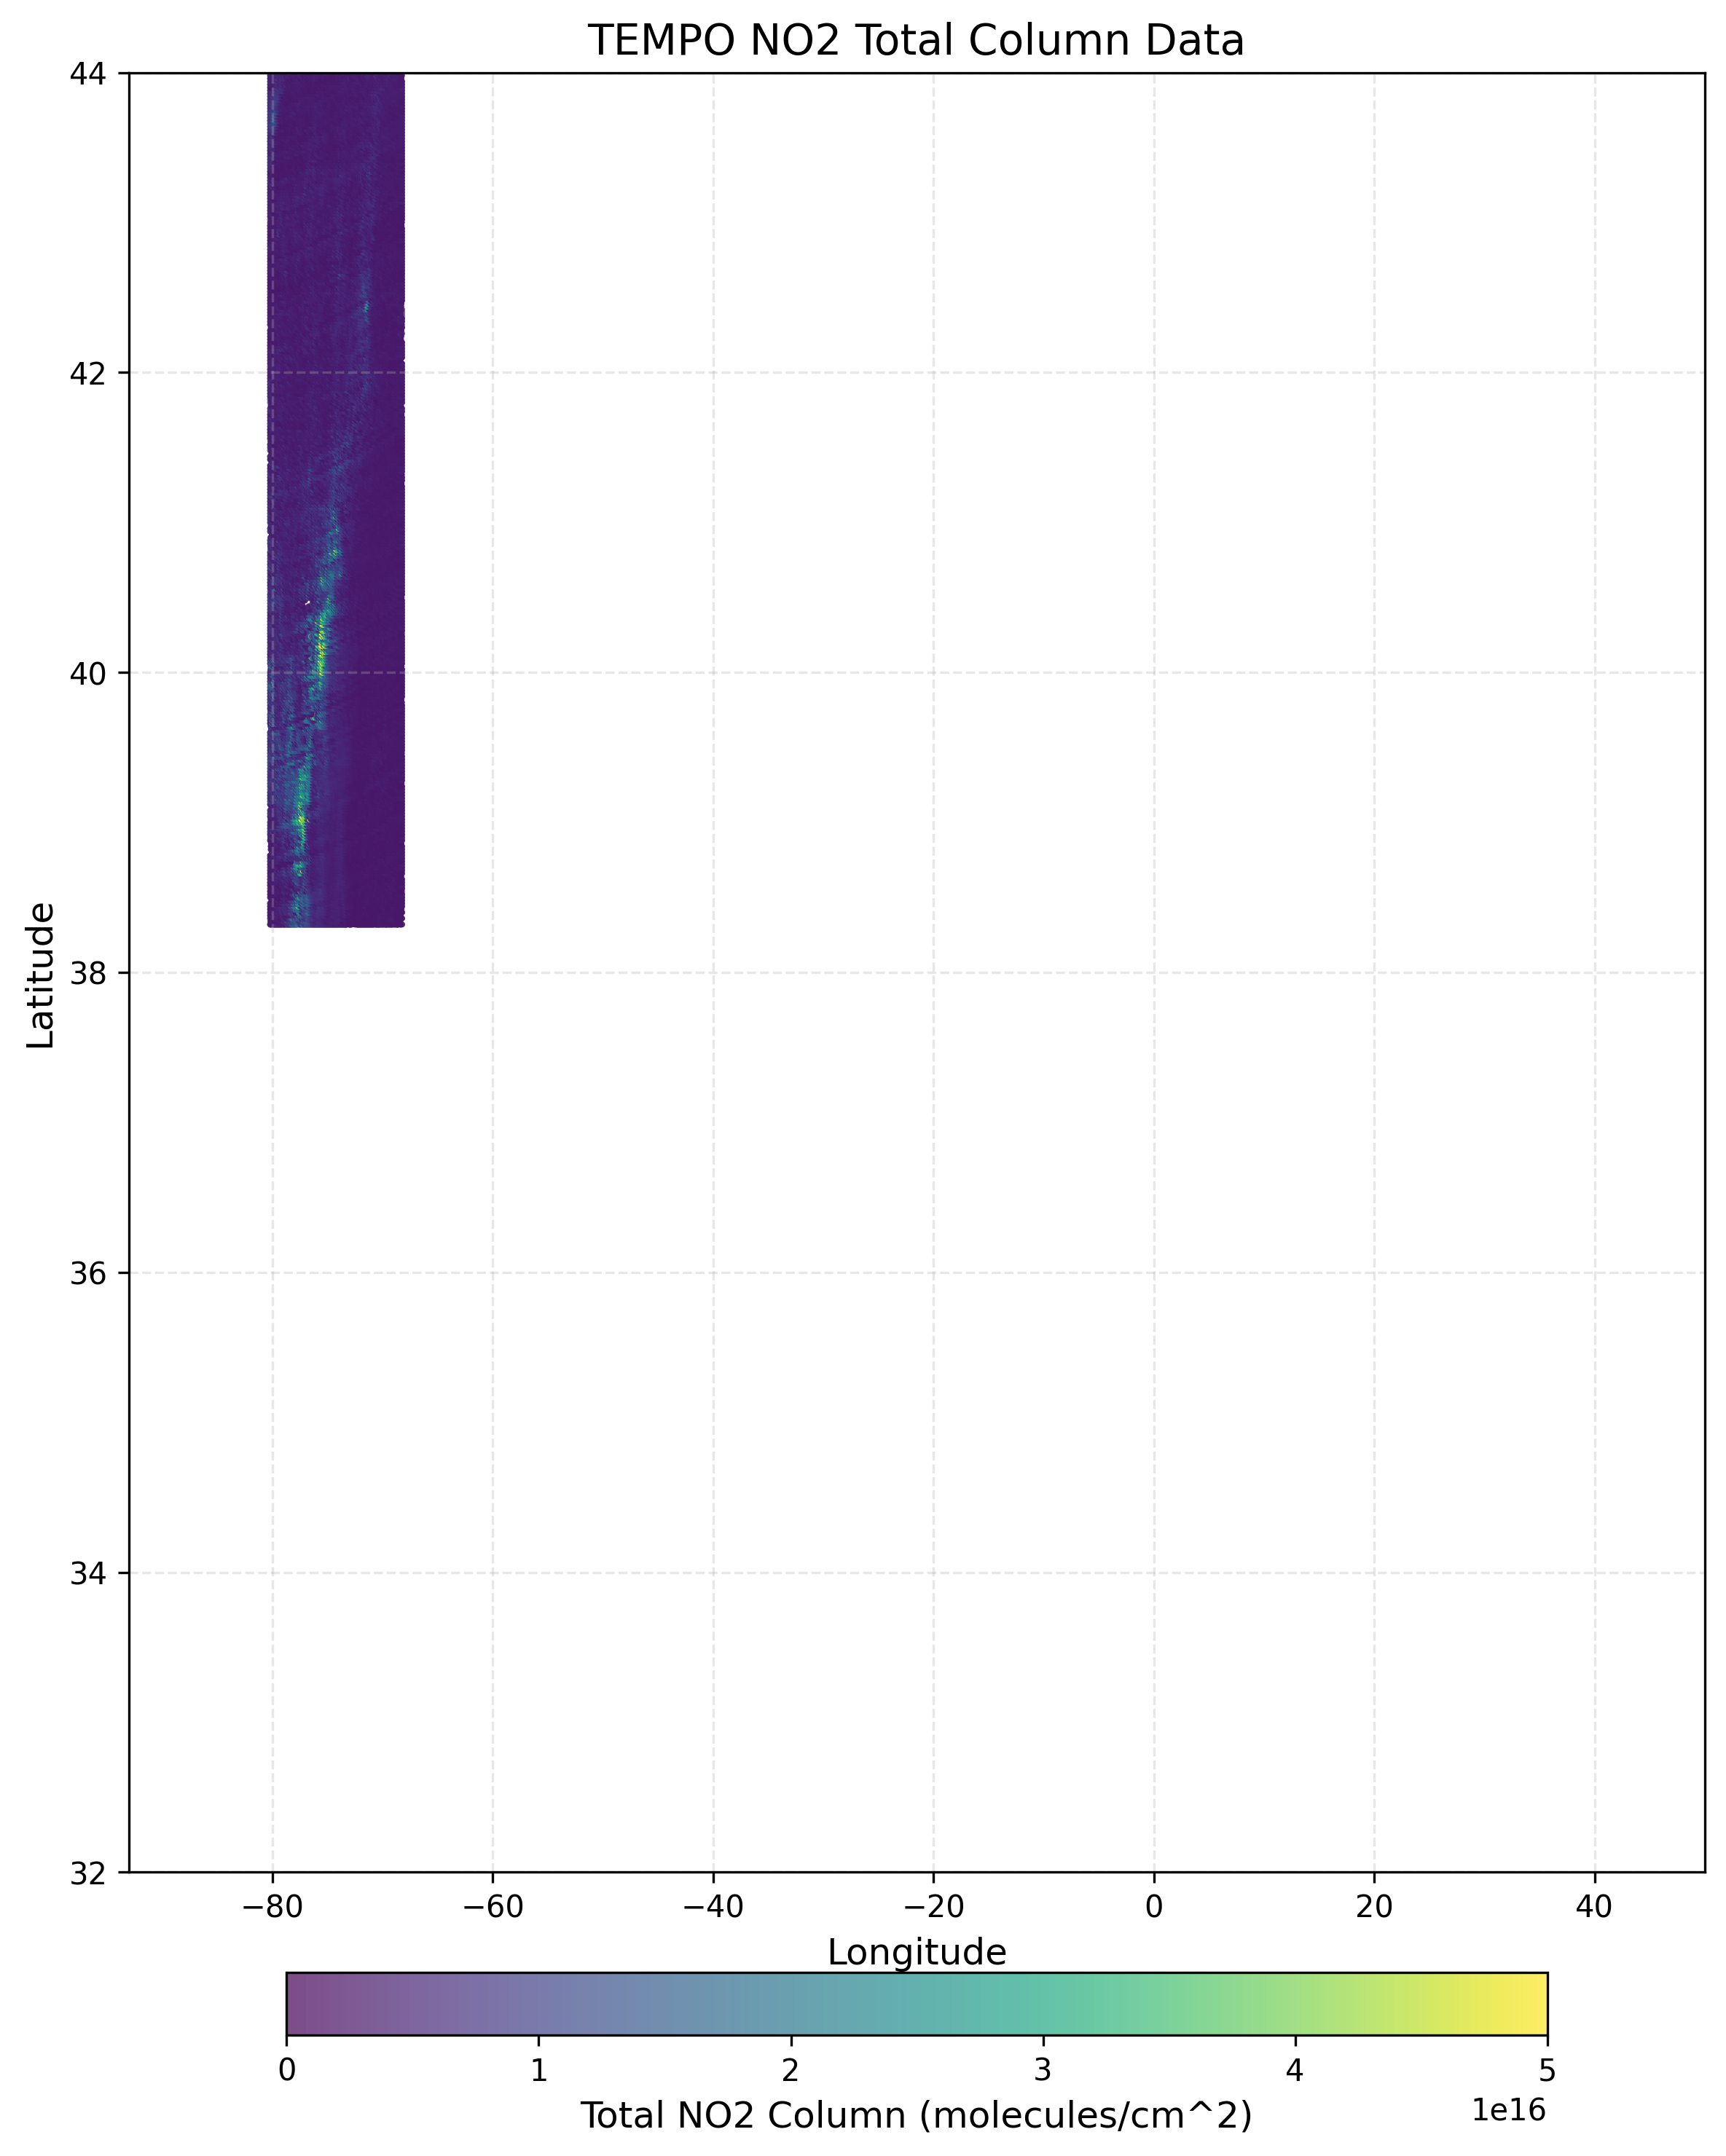

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Create a simple figure
fig, ax = plt.subplots(1, 1, figsize=(8, 10), dpi=300, facecolor='white')

# Create scatter plot
im = ax.scatter(
    lon_loc_2D[best_data_mask_loc] + 0.01,
    lat_loc_2D[best_data_mask_loc] + 0.01,
    s=1.0,
    c=trop_NO2_column_loc[best_data_mask_loc] + strat_NO2_column_loc[best_data_mask_loc],
    vmin=0,
    vmax=5.0e16,
    cmap='viridis',
    alpha=0.7
)

# Set axis limits to your region
ax.set_xlim(-93, 50)
ax.set_ylim(32, 44)

# Add labels and title
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('TEMPO NO2 Total Column Data', fontsize=14)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Create colorbar
cb = plt.colorbar(
    im,
    ax=ax,
    ticks=[0, 1.0e16, 2.0e16, 3.0e16, 4.0e16, 5.0e16],
    location="bottom",
    fraction=0.05,
    pad=0.05,
    shrink=0.8
)
cb.set_label("Total NO2 Column (" + NO2_unit + ")", fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

In [187]:
(np.float64(43.299428), np.float64(-74.217933))

(np.float64(43.299428), np.float64(-74.217933))

In [188]:
import numpy as np

def find_no2_at_location(lat_target, lon_target, lat_data, lon_data, no2_data, mask):
    """
    Encontra o valor de NO2 mais próximo de uma coordenada específica
    
    Parameters:
    lat_target: latitude desejada
    lon_target: longitude desejada
    lat_data: array de latitudes dos dados
    lon_data: array de longitudes dos dados
    no2_data: array de valores de NO2
    mask: máscara para dados válidos
    """
    
    # Aplicar a máscara aos dados
    lat_masked = lat_data[mask]
    lon_masked = lon_data[mask]
    no2_masked = no2_data[mask]
    
    # Calcular distâncias (aproximação simples)
    distances = np.sqrt((lat_masked - lat_target)**2 + (lon_masked - lon_target)**2)
    
    # Encontrar o índice do ponto mais próximo
    closest_idx = np.argmin(distances)
    
    # Retornar informações do ponto mais próximo
    closest_lat = lat_masked[closest_idx]
    closest_lon = lon_masked[closest_idx]
    no2_value = no2_masked[closest_idx]
    distance = distances[closest_idx]
    
    return {
        'target_lat': lat_target,
        'target_lon': lon_target,
        'closest_lat': closest_lat,
        'closest_lon': closest_lon,
        'no2_value': no2_value,
        'distance': distance
    }

# Exemplo de uso
lat_target = 40.0  # Exemplo: latitude de Nova York
lon_target = -74.0  # Exemplo: longitude de Nova York

result = find_no2_at_location(
    lat_target, lon_target, 
    lat_loc_2D, lon_loc_2D, 
    trop_NO2_column_loc + strat_NO2_column_loc,
    best_data_mask_loc
)

print(f"Coordenada desejada: ({lat_target}, {lon_target})")
print(f"Ponto mais próximo: ({result['closest_lat']:.4f}, {result['closest_lon']:.4f})")
print(f"Valor de NO2: {result['no2_value']:.2e} {NO2_unit}")
print(f"Distância: {result['distance']:.4f} graus")

Coordenada desejada: (40.0, -74.0)
Ponto mais próximo: (39.9900, -74.0100)
Valor de NO2: 3.31e+15 molecules/cm^2
Distância: 0.0141 graus


In [189]:
from scipy.interpolate import griddata

def interpolate_no2_at_location(lat_target, lon_target, lat_data, lon_data, no2_data, mask):
    """
    Interpola o valor de NO2 em uma coordenada específica
    """
    
    # Aplicar a máscara
    lat_masked = lat_data[mask]
    lon_masked = lon_data[mask]
    no2_masked = no2_data[mask]
    
    # Criar pontos de interpolação
    points = np.column_stack((lat_masked, lon_masked))
    
    # Interpolar
    interpolated_value = griddata(
        points, 
        no2_masked, 
        (lat_target, lon_target), 
        method='linear'
    )
    
    return interpolated_value

# Exemplo de uso
lat_target = 40.0
lon_target = -74.0

interpolated_no2 = interpolate_no2_at_location(
    lat_target, lon_target,
    lat_loc_2D, lon_loc_2D,
    trop_NO2_column_loc + strat_NO2_column_loc,
    best_data_mask_loc
)

print(f"NO2 interpolado em ({lat_target}, {lon_target}): {interpolated_no2:.2e} {NO2_unit}")

NO2 interpolado em (40.0, -74.0): 3.67e+15 molecules/cm^2
